In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
from xgboost import XGBClassifier
import pickle

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


plt.style.use('ggplot')
plt.rcParams.update({'font.size': 18})

In [2]:
df = pd.read_json('../data/data.json')

In [3]:
df['acct_type'].unique()

array(['fraudster_event', 'premium', 'spammer_warn', 'fraudster',
       'spammer_limited', 'spammer_noinvite', 'locked', 'tos_lock',
       'tos_warn', 'fraudster_att', 'spammer_web', 'spammer'],
      dtype=object)

In [4]:
df['fraud'] = np.where(df['acct_type'].str.contains('fraud'), 1, 0)

In [5]:
fraud_counts = df['fraud'].value_counts()
fraud_counts

0    13044
1     1293
Name: fraud, dtype: int64

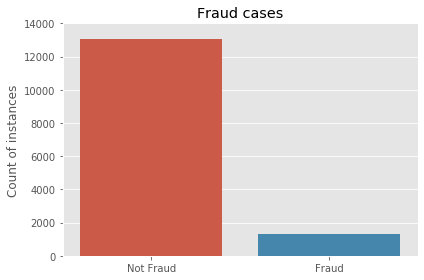

In [7]:
sns.barplot(x = ['Not Fraud', 'Fraud'], y = fraud_counts)
plt.title('Fraud cases')
plt.yticks(np.arange(0, 15000, 2000))
plt.ylabel('Count of instances')
plt.tight_layout()
plt.savefig('../images/fraud_counts.png')

In [8]:
df.isna().any()

acct_type             False
approx_payout_date    False
body_length           False
channels              False
country                True
currency              False
delivery_method        True
description           False
email_domain          False
event_created         False
event_end             False
event_published        True
event_start           False
fb_published          False
gts                   False
has_analytics         False
has_header             True
has_logo              False
listed                False
name                  False
name_length           False
num_order             False
num_payouts           False
object_id             False
org_desc              False
org_facebook           True
org_name              False
org_twitter            True
payee_name            False
payout_type           False
previous_payouts      False
sale_duration          True
sale_duration2        False
show_map              False
ticket_types          False
user_age            

In [9]:
df.isnull().sum()

acct_type                0
approx_payout_date       0
body_length              0
channels                 0
country                 81
currency                 0
delivery_method         16
description              0
email_domain             0
event_created            0
event_end                0
event_published         99
event_start              0
fb_published             0
gts                      0
has_analytics            0
has_header            5409
has_logo                 0
listed                   0
name                     0
name_length              0
num_order                0
num_payouts              0
object_id                0
org_desc                 0
org_facebook            59
org_name                 0
org_twitter             59
payee_name               0
payout_type              0
previous_payouts         0
sale_duration          155
sale_duration2           0
show_map                 0
ticket_types             0
user_age                 0
user_created             0
u

In [10]:
df['ticket_types'].head()

0    [{'event_id': 527017, 'cost': 25.0, 'availabil...
1    [{'event_id': 786878, 'cost': 35.0, 'availabil...
2    [{'event_id': 787337, 'cost': 93.51, 'availabi...
3    [{'event_id': 885645, 'cost': 25.0, 'availabil...
4    [{'event_id': 1114349, 'cost': 150.0, 'availab...
Name: ticket_types, dtype: object

In [11]:
for line in df.ticket_types:
   print (line)

[{'event_id': 527017, 'cost': 25.0, 'availability': 1, 'quantity_total': 800, 'quantity_sold': 0}, {'event_id': 527017, 'cost': 50.0, 'availability': 1, 'quantity_total': 100, 'quantity_sold': 0}, {'event_id': 527017, 'cost': 550.0, 'availability': 1, 'quantity_total': 20, 'quantity_sold': 0}]
[{'event_id': 786878, 'cost': 35.0, 'availability': 1, 'quantity_total': 50, 'quantity_sold': 22}, {'event_id': 786878, 'cost': 35.0, 'availability': 1, 'quantity_total': 50, 'quantity_sold': 3}]
[{'event_id': 787337, 'cost': 93.51, 'availability': 1, 'quantity_total': 48, 'quantity_sold': 48}]
[{'event_id': 885645, 'cost': 25.0, 'availability': 1, 'quantity_total': 5000, 'quantity_sold': 10}, {'event_id': 885645, 'cost': 15.0, 'availability': 1, 'quantity_total': 5000, 'quantity_sold': 23}, {'event_id': 885645, 'cost': 10.0, 'availability': 1, 'quantity_total': 5000, 'quantity_sold': 8}, {'event_id': 885645, 'cost': 5.0, 'availability': 1, 'quantity_total': 5000, 'quantity_sold': 12}, {'event_id

[{'event_id': 1186209, 'cost': 25.0, 'availability': 1, 'quantity_total': 15, 'quantity_sold': 4}, {'event_id': 1186209, 'cost': 37.0, 'availability': 1, 'quantity_total': 6, 'quantity_sold': 1}]
[{'event_id': 1209189, 'cost': 25.0, 'availability': 1, 'quantity_total': 160, 'quantity_sold': 160}]
[{'event_id': 1251877, 'cost': 15.0, 'availability': 1, 'quantity_total': 250, 'quantity_sold': 118}, {'event_id': 1251877, 'cost': 20.0, 'availability': 1, 'quantity_total': 75, 'quantity_sold': 59}, {'event_id': 1251877, 'cost': 0.0, 'availability': 1, 'quantity_total': 100, 'quantity_sold': 1}]
[{'event_id': 1252013, 'cost': 28.0, 'availability': 1, 'quantity_total': 40, 'quantity_sold': 7}, {'event_id': 1252013, 'cost': 35.0, 'availability': 1, 'quantity_total': 40, 'quantity_sold': 6}, {'event_id': 1252013, 'cost': 38.0, 'availability': 1, 'quantity_total': 40, 'quantity_sold': 1}]
[{'event_id': 1252301, 'cost': 17.91, 'availability': 1, 'quantity_total': 60, 'quantity_sold': 32}, {'event

[{'event_id': 3748780, 'cost': 10.0, 'availability': 1, 'quantity_total': 1, 'quantity_sold': 1}, {'event_id': 3748780, 'cost': 10.0, 'availability': 1, 'quantity_total': 1, 'quantity_sold': 1}, {'event_id': 3748780, 'cost': 10.0, 'availability': 1, 'quantity_total': 1, 'quantity_sold': 1}, {'event_id': 3748780, 'cost': 10.0, 'availability': 1, 'quantity_total': 1, 'quantity_sold': 1}, {'event_id': 3748780, 'cost': 10.0, 'availability': 1, 'quantity_total': 1, 'quantity_sold': 1}, {'event_id': 3748780, 'cost': 10.0, 'availability': 1, 'quantity_total': 1, 'quantity_sold': 1}]
[{'event_id': 3748810, 'cost': 10.0, 'availability': 1, 'quantity_total': 30, 'quantity_sold': 0}, {'event_id': 3748810, 'cost': 15.0, 'availability': 1, 'quantity_total': 20, 'quantity_sold': 3}]
[{'event_id': 3781186, 'cost': 9.0, 'availability': 1, 'quantity_total': 65, 'quantity_sold': 36}]
[{'event_id': 3781198, 'cost': 9.0, 'availability': 1, 'quantity_total': 65, 'quantity_sold': 11}]
[{'event_id': 3781312,

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [12]:
num_cols = df.select_dtypes(include=["float", 'int']).columns
num_cols

Index(['approx_payout_date', 'body_length', 'channels', 'delivery_method', 'event_created', 'event_end', 'event_published', 'event_start', 'fb_published', 'gts', 'has_analytics', 'has_header', 'has_logo', 'name_length', 'num_order', 'num_payouts', 'object_id', 'org_facebook', 'org_twitter', 'sale_duration', 'sale_duration2', 'show_map', 'user_age', 'user_created', 'user_type', 'venue_latitude', 'venue_longitude', 'fraud'], dtype='object')

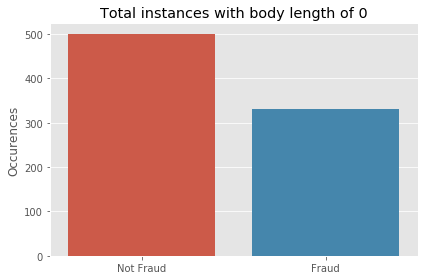

In [13]:
# for col in num_cols:
#     print(f"Fraud counts for {col}:\n {df[col][df['fraud']==1].value_counts().head()}")
#     print(f"NOT Fraud counts for {col}:\n {df[col][df['fraud']==0].value_counts().head()}")

body_length_plot = df['body_length'][df['fraud']==1].value_counts().head(1)
body_length_plot_2 = df['body_length'][df['fraud']==0].value_counts().head(1)   
body = [body_length_plot_2[0], body_length_plot[0]]

sns.barplot(x= ['Not Fraud', 'Fraud'], y = body)

plt.ylabel('Occurences')
plt.title('Total instances with body length of 0')
plt.tight_layout()
plt.savefig('../images/body_length_zero.png')
plt.show()

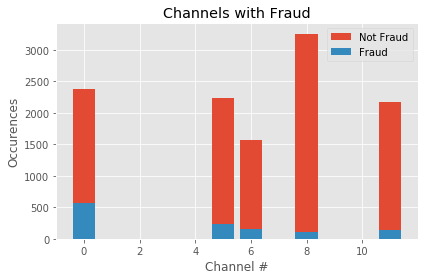

In [42]:
# for col in num_cols:
#     print(f"Fraud counts for {col}:\n {df[col][df['fraud']==1].value_counts().head()}")
#     print(f"NOT Fraud counts for {col}:\n {df[col][df['fraud']==0].value_counts().head()}")

channel_fraud = df['channels'][df['fraud']==1].value_counts().head(5)
channel_not_fraud = df['channels'][df['fraud']==0].value_counts().head(5)   
chan = [channel_not_fraud[5], channel_fraud[5]]

plt.bar(x = channel_not_fraud.index, height = channel_not_fraud, label = 'Not Fraud')
plt.bar(x = channel_fraud.index, height = channel_fraud, label = 'Fraud')


plt.ylabel('Occurences')
plt.xlabel('Channel #')
plt.title('Channels with Fraud')
plt.tight_layout()
plt.legend()
plt.savefig('../images/channels_fraud.png')
plt.show()
# print(channel_fraud)
# print(channel_not_fraud)
# print(len(channel_not_fraud))


In [12]:
def dummy_it(df, columns):
    '''
    columns = list or array of columns in dataframe
    '''
    df = pd.get_dummies(df, columns = columns)
    return df

def drop_col(df, columns):
    df.drop(columns, axis=1, inplace=True)
    return df

In [14]:
dummy_list = ['currency', 'country']
dummy_it(df, dummy_list)

acct_type  approx_payout_date  body_length  channels  delivery_method                                        description                  email_domain  event_created   event_end  event_published  event_start  fb_published       gts  has_analytics  has_header  has_logo listed                                               name  name_length  num_order  num_payouts  object_id                                           org_desc  org_facebook                                           org_name  org_twitter                                         payee_name payout_type                                   previous_payouts  sale_duration  sale_duration2  show_map                                       ticket_types  user_age  user_created  user_type  fraud  currency_AUD  currency_CAD  currency_EUR  currency_GBP  currency_MXN  currency_NZD  currency_USD  country_  country_A1  country_AE  country_AR  country_AT  country_AU  country_BB  country_BE  country_BG  country_BS  country_CA  \
0       fraudster_event          1266062400         3852         5              0.0  <p><a href="http://s432.photobucket.com/albums...                     gmail.com     1262739706  1265630400     1.263110e+09   1265594400             0      0.00              0         1.0         0      y  99 HOUR "NO SLEEP" SUPER BOWL CELEBRITY WEEKEN...           60          0            0     527017                                                              0.0              Party Starz Ent & Diverse Int'l Group          0.0                                                                                                                []           29.0              33         1  [{'event_id': 527017, 'cost': 25.0, 'availabil...        36    1259613950          1      1             0             0             0             0             0             0             1         0           0           0           0           0           0           0           0           0           0           0   
1               premium          1296720000         3499         0              1.0  <p>Join us for a quick, one-night, community-b...                       ruf.org     1293832670  1296288000     1.293833e+09   1296255600             0    868.02              0         0.0         1      n                        Winthrop RUF Winter Getaway           27         23            1     786878  <p>Since 1987, RUF has ministered to students ...           0.0                         RUF at Winthrop University         12.0                                                RUF       CHECK  [{'name': 'RUF', 'created': '2010-10-01 01:10:...           28.0              28         0  [{'event_id': 786878, 'cost': 35.0, 'availabil...       149    1280942776          3      0             0             0             0             0             0             0             1         0           0           0           0           0           0           0           0           0           0           0   
2               premium          1296172800         2601         8              1.0  <h3><span class="subcategory"><strong>Teacher ...                pvsd.k12.ca.us     1291090956  1295740800     1.291092e+09   1295713800             0   3500.00              0         NaN         0      y                       DRDP (2010) Teacher Training           28         19            4     787337  <p><a href="http://www.desiredresults.com">www...           0.0  University Preparation School in collaboration...          0.0                      University Preparation School       CHECK  [{'name': 'Danielle Severn', 'created': '2010-...           54.0              54         0  [{'event_id': 787337, 'cost': 93.51, 'availabi...       214    1272559388          3      0             0             0             0             0             0             0             1         0           0           0           0           0           0           0           0           0           0           0   
3               premium   

In [15]:
leakage_cols = ['gts', 'acct_type']
drop_col(df, leakage_cols)

approx_payout_date  body_length  channels country currency  delivery_method                                        description                  email_domain  event_created   event_end  event_published  event_start  fb_published  has_analytics  has_header  has_logo listed                                               name  name_length  num_order  num_payouts  object_id                                           org_desc  org_facebook                                           org_name  org_twitter                                         payee_name payout_type                                   previous_payouts  sale_duration  sale_duration2  show_map                                       ticket_types  user_age  user_created  user_type  fraud
0              1266062400         3852         5      US      USD              0.0  <p><a href="http://s432.photobucket.com/albums...                     gmail.com     1262739706  1265630400     1.263110e+09   1265594400             0              0         1.0         0      y  99 HOUR "NO SLEEP" SUPER BOWL CELEBRITY WEEKEN...           60          0            0     527017                                                              0.0              Party Starz Ent & Diverse Int'l Group          0.0                                                                                                                []           29.0              33         1  [{'event_id': 527017, 'cost': 25.0, 'availabil...        36    1259613950          1      1
1              1296720000         3499         0      US      USD              1.0  <p>Join us for a quick, one-night, community-b...                       ruf.org     1293832670  1296288000     1.293833e+09   1296255600             0              0         0.0         1      n                        Winthrop RUF Winter Getaway           27         23            1     786878  <p>Since 1987, RUF has ministered to students ...           0.0                         RUF at Winthrop University         12.0                                                RUF       CHECK  [{'name': 'RUF', 'created': '2010-10-01 01:10:...           28.0              28         0  [{'event_id': 786878, 'cost': 35.0, 'availabil...       149    1280942776          3      0
2              1296172800         2601         8      US      USD              1.0  <h3><span class="subcategory"><strong>Teacher ...                pvsd.k12.ca.us     1291090956  1295740800     1.291092e+09   1295713800             0              0         NaN         0      y                       DRDP (2010) Teacher Training           28         19            4     787337  <p><a href="http://www.desiredresults.com">www...           0.0  University Preparation School in collaboration...          0.0                      University Preparation School       CHECK  [{'name': 'Danielle Severn', 'created': '2010-...           54.0              54         0  [{'event_id': 787337, 'cost': 93.51, 'availabi...       214    1272559388          3      0
3              1388966400        12347         6      IE      EUR              1.0  <p style="margin-bottom: 1.3em; padding-bottom...          irishtabletennis.com     1360681570  1388534400     1.360683e+09   1360702800             0              0         0.0         1      y                              ITTA Affiliation 2013           21         39           16     885645                                                              0.0                                                             0.0                                                            ACH  [{'name': '', 'created': '2010-11-09 01:10:15'...            0.0               0         0  [{'event_id': 885645, 'cost': 25.0, 'availabil...       889    1283870102          3      0
4              1297900800         2417        11      US      USD              0.0  <p>Writers and filmmakers need to understand t...    artsandbusinesscouncil.org     1291994666  1297468800     1.291995e+09   1297440000            

In [16]:
str_cols = df.select_dtypes(include=["object"]).columns
str_cols

Index(['country', 'currency', 'description', 'email_domain', 'listed', 'name', 'org_desc', 'org_name', 'payee_name', 'payout_type', 'previous_payouts', 'ticket_types'], dtype='object')

In [ ]:
drop_list = ['venue_longitude', 'venue_name', 'venue_state',
             'venue_address', 'venue_country', 'venue_latitude']
drop_col(df, drop_list)

In [ ]:
Idx=df.set_index(['COL1','COL2']).COL3.apply(pd.Series).stack().index

pd.DataFrame(df.set_index(['COL1','COL2']).COL3.apply(pd.Series).stack()
             .values.tolist(),index=Idx).reset_index().drop('level_2',1)

In [23]:
df.ticket_types.apply(pd.Series)

0                                                  1                                                  2                                                  3                                                  4                                                  5                                                  6                                                  7                                                  8                                                  9                                                  10                                                 11                                                 12                                                 13                                                 14                                                 15                                                 16                                                 17                                                 18   \
0      {'event_id': 527017, 'cost': 25.0, 'availabili...  {'event_id': 527017, 'cost': 50.0, 'availabili...  {'event_id': 527017, 'cost': 550.0, 'availabil...                                                NaN                                                NaN                                                NaN                                                NaN                                                NaN                                                NaN                                                NaN                                                NaN                                                NaN                                                NaN                                                NaN                                                NaN                                                NaN                                                NaN                                                NaN                                                NaN   
1      {'event_id': 786878, 'cost': 35.0, 'availabili...  {'event_id': 786878, 'cost': 35.0, 'availabili...                                                NaN                                                NaN                                                NaN                                                NaN                                                NaN                                                NaN                                                NaN                                                NaN                                                NaN                                                NaN                                                NaN                                                NaN                                                NaN                                                NaN                                                NaN                                                NaN                                                NaN   
2      {'event_id': 787337, 'cost': 93.51, 'availabil...                                                NaN                                                NaN                                                NaN                                                NaN                                                NaN                                                NaN                                                NaN                                                NaN                                                NaN                                                NaN                                                NaN                                                NaN                                                NaN                                                NaN                                                NaN                                                NaN                                                NaN                                                NaN   
3      {'event_id': 885645, 'cost': 25.0, 'availabili...  {'event_id': 885645, 'cost': 15.0, 'availabili...  {'event_id': 885645, 'cost': 10.

In [ ]:
y = df.pop('fraud')
X = df
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [ ]:
# model = RandomForestClassifier(max_depth=10)
# model.fit(X_train, y_train)

In [52]:
df['email_domain']

0                           gmail.com
1                             ruf.org
2                      pvsd.k12.ca.us
3                irishtabletennis.com
4          artsandbusinesscouncil.org
5              bluegrassstallions.com
6                           naboe.org
7              themagnetictheatre.org
8                         credosf.com
9              themagnetictheatre.org
10                          sffsn.org
11                       foragesf.com
12                      dianagats.com
13                          ccice.org
14                  simplystylist.com
15                  racetonowhere.com
16                  racetonowhere.com
17                        comcast.net
18                   ipcybercrime.com
19               membersofmelange.com
20                ecufilmfestival.com
21               percussiononline.com
22                          gmail.com
23                        firstam.com
24                digitaleyemedia.com
25                          yahoo.com
26          

In [55]:
df['email_domain'][df['fraud']==1].value_counts()

gmail.com                    345
yahoo.com                    284
hotmail.com                  101
ymail.com                     44
aol.com                       40
lidf.co.uk                    35
live.com                      33
live.fr                       33
yahoo.co.uk                   26
rocketmail.com                20
yahoo.fr                      18
hotmail.co.uk                 17
ultimatewine.co.uk            13
yahoo.ca                      12
diversity-church.com          10
yopmail.com                   10
outlook.com                    9
yahoo.com.vn                   8
hotmail.fr                     6
mail.com                       6
aol.co.uk                      6
mohmal.com                     6
maroclancers.com               5
yahoo.de                       5
thinktankconsultancy.com       5
me.com                         4
live.co.uk                     4
att.net                        4
live.FR                        4
9and1.biz                      4
execs.com 

In [57]:
with open('../src/model.pkl', 'rb') as f:
    data = pickle.load(f)

In [58]:
data

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)